<a href="https://colab.research.google.com/github/thiagoald/processamentodeimagens/blob/master/halftone_conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Halftone Conversion

## Load necessary modules

In [47]:
import os
from google.colab import drive
from PIL import Image
import numpy as np
from IPython.display import display

## Mount GDrive

In [48]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## List images in directory


In [49]:
# List images
# os.getcwd()
images_paths = []
for root, dirs, files in os.walk('/content/drive/My Drive/PI'):
  for f in files:
    if os.path.splitext(f)[-1] in ['.jpeg', '.jpg', '.png']:
      print(os.path.join(root,f))
      images_paths.append(os.path.join(root,f))

/content/drive/My Drive/PI/lenna.png
/content/drive/My Drive/PI/cin.jpeg
/content/drive/My Drive/PI/lenna.png_halftone.png
/content/drive/My Drive/PI/cin.jpeg_halftone.png


## Choose an image to work with

In [50]:
image_path = images_paths[1]

## Load Image, convert to 9 levels of gray and create array to store halftone image

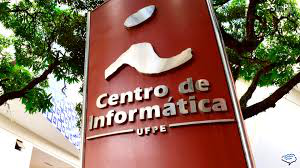

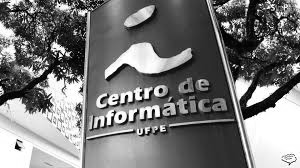

In [51]:
im = Image.open(image_path)
im_gray = np.array(im.convert(mode='L'))
im_gray_10tones = ((im_gray/im_gray.max())*9).astype('uint8')
x_shape, y_shape = im_gray_10tones.shape
im_gray_halftone = np.zeros((x_shape*3, y_shape*3))

# Show images
display(im)
display(Image.fromarray(im_gray))

## Create dictionary in order to map gray levels to halftones

In [52]:
mapping = { 0:np.array([[0,0,0],
                        [0,0,0],
                        [0,0,0]]),
            1:np.array([[0,1,0],
                        [0,0,0],
                        [0,0,0]]),
            2:np.array([[0,1,0],
                        [0,0,0],
                        [0,0,1]]),
            3:np.array([[1,1,0],
                        [0,0,0],
                        [0,0,1]]),
            4:np.array([[1,1,0],
                        [0,0,0],
                        [1,0,1]]),
            5:np.array([[1,1,1],
                        [0,0,0],
                        [1,0,1]]),
            6:np.array([[1,1,1],
                        [0,0,1],
                        [1,0,1]]),
            7:np.array([[1,1,1],
                        [0,0,1],
                        [1,1,1]]),
            8:np.array([[1,1,1],
                        [1,0,1],
                        [1,1,1]]),
            9:np.array([[1,1,1],
                        [1,1,1],
                        [1,1,1]])}

## Iterate over pixels converting each one to its respective halftone

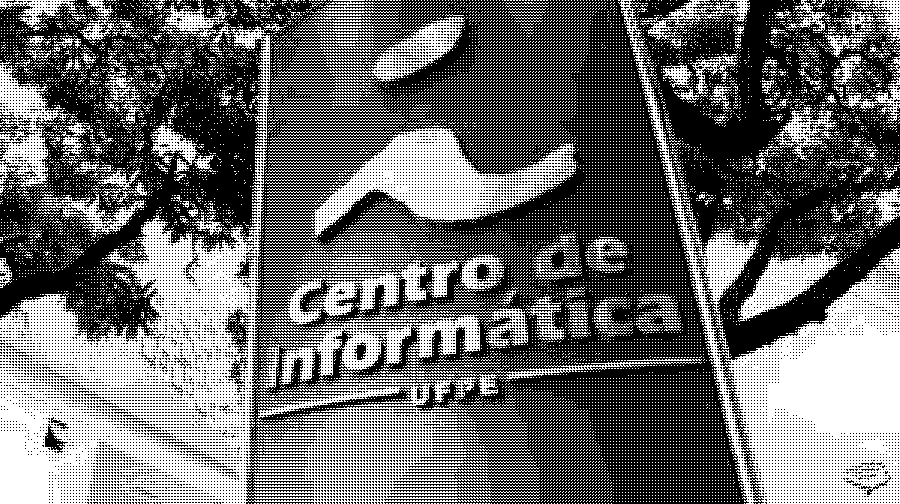

In [53]:
for i in range(x_shape):
    for j in range(y_shape):
        im_gray_halftone[3*i:3*i+3,3*j:3*j+3] = mapping[im_gray_10tones[i,j]]

# Show result
display(Image.fromarray(im_gray_halftone*255).convert('RGB'))

## Save result

In [54]:
Image.fromarray(im_gray_halftone*255).convert('RGB').save(image_path+'_halftone.png')